In [64]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

os.chdir('/tf-acno-projects/image-classification/test')
first_trained_loaded_model = tf.keras.models.load_model("../models/1_2024_12_5_0.912.keras")
re_trained_loaded_model = tf.keras.models.load_model("../models/re_trained_0.912.keras")
new_re_trained_loaded_model = tf.keras.models.load_model("../models/re_trained_06_02_2025_13H_18_0.891.keras")

In [99]:
img_path = "shocked1.jpg"
class_mapping = {
    0: 'angry',
    1: 'disgusted',
    2: 'happy',
    3: 'sad',
    4: 'shocked'
}
# Create a dummy label for evaluation (assuming a multi-class classification, replace with actual if available)
dummy_label = np.array(
    [[0,
      0,
      0,
      0,
      1]
     ])# Adjust based on your class mapping


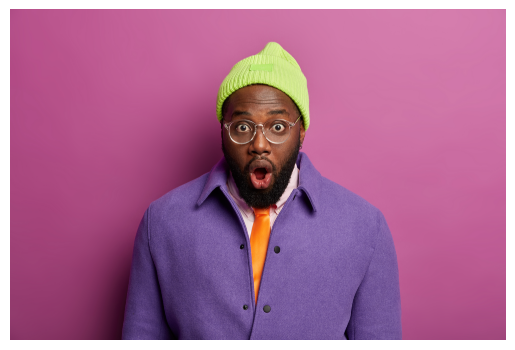

In [100]:
read_img = cv2.imread(img_path)
if read_img is None:
    raise ValueError("Image not found or unable to read.")

read_img = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
plt.imshow(read_img)
plt.axis('off')
plt.show()

# Convert the image to a TensorFlow tensor and resize it
resize = tf.image.resize(tf.convert_to_tensor(read_img, dtype=tf.float32), (128, 128))

resize = resize.numpy() / 255.0

In [101]:
#expand the dim of the image for the batch (256.256.3) to (1.256.256.3) , axis = 0 means it will be at the start
processed_image = np.expand_dims(resize, axis=0)

yhat_first_trained = first_trained_loaded_model.predict(processed_image)
yhat_re_trained = re_trained_loaded_model.predict(processed_image)
yhat_new_re = new_re_trained_loaded_model.predict(processed_image)

predicted_class = np.argmax(yhat_first_trained)
print(f'First Trained Model :')
print(f'Image: {img_path} , Prediction: {class_mapping.get(predicted_class, "UNKNOWN")} , argmax is : {predicted_class}')

predicted_class = np.argmax(yhat_re_trained)
print(f'Re Trained Model :')
print(f'Image: {img_path} , Prediction: {class_mapping.get(predicted_class, "UNKNOWN")} , argmax is : {predicted_class}')

predicted_class = np.argmax(yhat_new_re)
print(f'New Re Trained Model :')
print(f'Image: {img_path} , Prediction: {class_mapping.get(predicted_class, "UNKNOWN")} , argmax is : {predicted_class}')



1/1 [==============================] - 0s 13ms/step
First Trained Model :
Image: shocked1.jpg , Prediction: happy , argmax is : 2
Re Trained Model :
Image: shocked1.jpg , Prediction: shocked , argmax is : 4
New Re Trained Model :
Image: shocked1.jpg , Prediction: shocked , argmax is : 4


| Models   | M1  | M2  | M3  |
| :--------|:---:|:---:|:---:|
| angry    |  0  |  0  |  0  |
| disgusted|  0  |  0  |  0  |
| happy    |  1  |  1(more sure)  |  1  |
| happy2   |  0  |  0  |  0  |
| sad      |  1  |  1  |  1(more sure)  |
| shocked  |  0  |  1(more sure)  |  1  |

In [102]:
res = first_trained_loaded_model.evaluate(processed_image, dummy_label, verbose=1)
res = re_trained_loaded_model.evaluate(processed_image, dummy_label, verbose=1)
res = new_re_trained_loaded_model.evaluate(processed_image, dummy_label, verbose=1)

1/1 [==============================] - 0s 23ms/step - loss: 0.2533 - precision: 1.0000 - recall: 1.0000 - categorical_accuracy: 1.0000


## results for 06/02/2025
- M2 is the best one